# WeatherPy

### Analysis
-  Trend 1: 
-  Trend 2: 
-  Trend 3:

In [84]:
import json
import requests
import csv
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
from config import api_key

## Generate Cities List

In [59]:
# Build a list of cities
cities = []

# Make a list of random lats, lngs values
for x in range(10): 
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats_lngs = zip(lats, lngs)

# Make a for loop to get cities by lats, lngs
for lat, lon in lats_lngs:
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    
    if city not in cities:
        cities.append(city)

print(len(cities))

634


## Perform API Calls

In [64]:
# Print the list to make sure it works
print("Beginning Data Retrieval")
print("-" * 30)

row_count = 1

# Create a list to hold the info parsed 
city_data = []

# Loop through to get the info per city 
for city in cities:
    
    # Create the endpoint URL
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    params = {
        "units": "IMPERIAL",  
        "APPID": api_key, 
        "q": city
    }
    
    # Run requests to get the JSON files
    city_response = requests.get(base_url, params=params)
    
    # Print the list of URLS to make sure the loop works
    print(f"Processing Record {row_count} | {city}")
    print(city_response.url)
    row_count += 1
    
    # Use try/except to skip any cities with errors 
    try: 
        city_response_json = city_response.json()
        city_cloudiness = city_response_json["clouds"]["all"]
        country = city_response_json["sys"]["country"]
        city_date = city_response_json["dt"]
        city_humidity = city_response_json["main"]["humidity"]
        city_lat = city_response_json["coord"]["lat"]
        city_lng = city_response_json["coord"]["lon"]
        city_max_temp = city_response_json["main"]["temp_max"]
        city_wind_speed = city_response_json["wind"]["speed"]
        
        # Append the list to a single dictionary for each parameter 
        city_data.append({"City": city, 
                          "Cloudiness": city_cloudiness, 
                          "Country": country, 
                          "Date": city_date, 
                          "Humidity": city_humidity, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Wind Speed": city_wind_speed})
        
    except KeyError:
        print("City not found. Skipping...")

print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | baykit
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=baykit
Processing Record 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=butaritari
Processing Record 3 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=egvekinot
Processing Record 4 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=saint+anthony
Processing Record 5 | astoria
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=astoria
Processing Record 6 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=belushya+guba
City not found. Skipping...
Processing Record 7 | yellowknife
http

Processing Record 57 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=katsuura
Processing Record 58 | san angelo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=san+angelo
Processing Record 59 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=hualmay
Processing Record 60 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=bubaque
Processing Record 61 | bahir dar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=bahir+dar
Processing Record 62 | havelock
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=havelock
Processing Record 63 | amderma
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=

Processing Record 113 | cape town
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=cape+town
Processing Record 114 | pak phanang
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=pak+phanang
Processing Record 115 | takhtamygda
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=takhtamygda
Processing Record 116 | mantua
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=mantua
Processing Record 117 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=ahipara
Processing Record 118 | lebu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=lebu
Processing Record 119 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bf

Processing Record 169 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=severo-kurilsk
Processing Record 170 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=bengkulu
Processing Record 171 | dalvik
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=dalvik
Processing Record 172 | gilazi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=gilazi
City not found. Skipping...
Processing Record 173 | huicungo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=huicungo
Processing Record 174 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=norman+wells
Processing Record 175 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=IMPE

Processing Record 225 | luorong
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=luorong
Processing Record 226 | yirol
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=yirol
City not found. Skipping...
Processing Record 227 | waingapu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=waingapu
Processing Record 228 | kungurtug
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=kungurtug
Processing Record 229 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=hithadhoo
Processing Record 230 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=buraydah
Processing Record 231 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169

Processing Record 281 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=aykhal
Processing Record 282 | kiruna
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=kiruna
Processing Record 283 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=talnakh
Processing Record 284 | touros
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=touros
Processing Record 285 | te anau
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=te+anau
Processing Record 286 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=tsihombe
Processing Record 287 | benguela
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=benguela
P

Processing Record 338 | fukue
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=fukue
Processing Record 339 | flinders
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=flinders
Processing Record 340 | bakel
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=bakel
City not found. Skipping...
Processing Record 341 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=iqaluit
Processing Record 342 | grandview
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=grandview
Processing Record 343 | caborca
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=caborca
City not found. Skipping...
Processing Record 344 | lazurne
http://api.openweathermap.org/data/2.5/weather?units=IMP

Processing Record 394 | bogalusa
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=bogalusa
Processing Record 395 | karaman
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=karaman
Processing Record 396 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=kavieng
Processing Record 397 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=saldanha
Processing Record 398 | santa marta
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=santa+marta
Processing Record 399 | mizdah
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=mizdah
Processing Record 400 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc

Processing Record 449 | yatou
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=yatou
Processing Record 450 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=labuhan
Processing Record 451 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=riyadh
Processing Record 452 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=nemuro
Processing Record 453 | aleksandrovskiy zavod
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=aleksandrovskiy+zavod
Processing Record 454 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=omsukchan
Processing Record 455 | nabul
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5

Processing Record 505 | jalu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=jalu
Processing Record 506 | pacifica
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=pacifica
Processing Record 507 | dinagat
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=dinagat
Processing Record 508 | newport
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=newport
Processing Record 509 | todos santos
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=todos+santos
Processing Record 510 | maceio
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=maceio
Processing Record 511 | prince albert
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41

Processing Record 561 | buciumi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=buciumi
Processing Record 562 | ust-uda
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=ust-uda
Processing Record 563 | san andres
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=san+andres
Processing Record 564 | ushtobe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=ushtobe
City not found. Skipping...
Processing Record 565 | polovinnoye
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=polovinnoye
Processing Record 566 | marcona
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=marcona
Processing Record 567 | fort saint john
http://api.openweathermap.org/data/2.5/weather?units=IMPERIA

Processing Record 617 | nasturelu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=nasturelu
Processing Record 618 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=san+policarpo
Processing Record 619 | arman
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=arman
Processing Record 620 | mandan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=mandan
Processing Record 621 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=kloulklubed
Processing Record 622 | atasu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0b41&q=atasu
Processing Record 623 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=281169e2e57d334a81d5f9cc0bfc0

In [65]:
# Create a DataFrame with the information received 
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [67]:
# Display the City DataFrame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,baykit,92,RU,1511028661,62,61.67,96.37,-8.68,3.71
1,butaritari,0,KI,1511028661,100,3.07,172.79,83.44,1.14
2,egvekinot,92,RU,1511028662,88,66.32,-179.17,21.92,8.52
3,saint anthony,1,US,1511027700,64,45.02,-93.22,35.60,10.29
4,astoria,1,US,1511027700,87,46.19,-123.83,46.40,6.93


## Latitude vs Temperature Plot

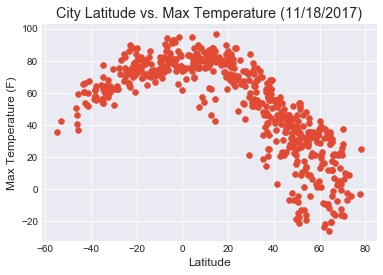

In [83]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o")
plt.xlim(plt)
plt.ylim()
plt.title("City Latitude vs. Max Temperature (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs Humidity Plot

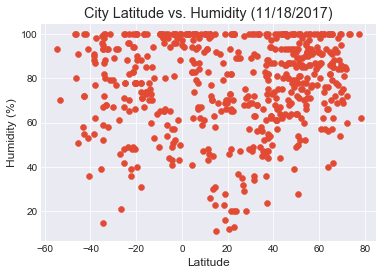

In [85]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs Cloudiness Plot

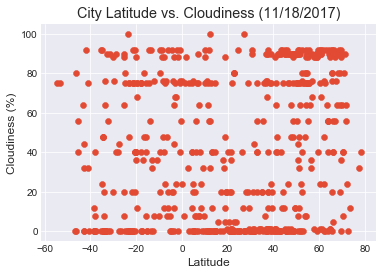

In [87]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs Wind Speed Plot

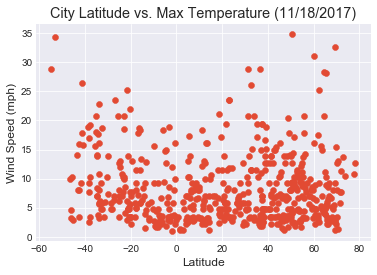

In [88]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o")
plt.title("City Latitude vs. Max Temperature (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()